In [3]:
import pandas as pd

ataque = pd.read_csv("datos/UNSW_NB15.csv")

ataque.drop(columns=["id","dur","proto","service","state","sinpkt","dinpkt","sjit","djit","swin","stcpb","dtcpb","dwin","tcprtt","synack","ackdat","smean","dmean","trans_depth","response_body_len","ct_srv_src","ct_state_ttl","ct_dst_ltm","ct_src_dport_ltm","ct_dst_sport_ltm","ct_dst_src_ltm","is_ftp_login","ct_ftp_cmd","ct_flw_http_mthd","ct_src_ltm","ct_srv_dst"], inplace=True)

ataque.sample(frac=2/3, replace=True)
ataque.sample(frac=2/3, replace=True)
ataque.sample(frac=2/3, replace=True)
ataque.sample(frac=2/3, replace=True)
ataque.sample(frac=2/3, replace=True)

,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,is_sm_ips_ports,attack_cat,label
63290,10,6,1072,268,40.480913,254,252,2.083418e+04,4836.119629,2,1,0,Exploits,1
66057,2,0,200,0,333333.321500,254,0,2.666667e+08,0.000000,0,0,0,Exploits,1
17756,2,2,130,162,2636.203749,31,29,4.569420e+05,569420.000000,0,0,0,Normal,0
172735,2,0,114,0,333333.321500,254,0,1.520000e+08,0.000000,0,0,0,Generic,1
112526,338,72,437120,4068,79.364353,62,252,6.765599e+05,6228.064453,166,8,0,Exploits,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30649,52,54,2934,3740,124.159118,31,29,2.722514e+04,34726.714840,11,15,0,Normal,0
92841,2,0,200,0,500000.001300,254,0,4.000000e+08,0.000000,0,0,0,DoS,1
74741,146,42,172367,2594,40.854565,62,252,2.991988e+05,4427.149414,70,8,0,Exploits,1
141260,2,0,114,0,500000.001300,254,0,2.280000e+08,0.000000,0,0,0,Generic,1


In [9]:
ataque.columns

Index(['spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload',
       'dload', 'sloss', 'dloss', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [11]:
ataque['attack_cat'] = ataque['attack_cat'].apply(lambda x: 'DDoS' if x == 'DoS' else 'Normal')


In [12]:
from sklearn.model_selection import train_test_split

X = ataque.drop(columns=['attack_cat'])
y = ataque[['attack_cat']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=2, criterion="gini", max_features="sqrt", bootstrap=True, max_samples=2/3, oob_score=True)

forest.fit(X_train, y_train)


#print(forest.predict(pruebas))


print("Exactitud del Entrenamiento: \b")
print(forest.score(X_train, y_train))
print("Exactitud en Pruebas: \b")
print(forest.oob_score_)

C:\Users\adali\AppData\Local\Temp\ipykernel_10712\1526270332.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\adali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Exactitud del Entrenamiento:
0.9334150792745523
Exactitud en Pruebas:
0.7198157864719973


In [23]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

feature = ataque.drop(columns=["attack_cat"])




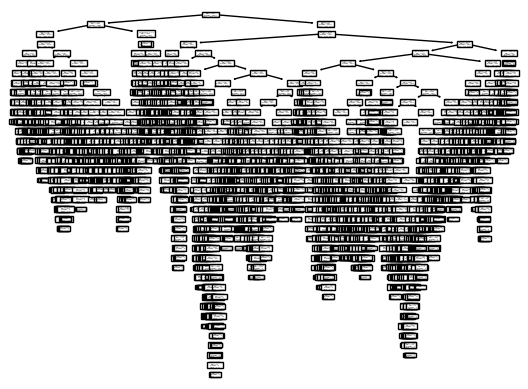

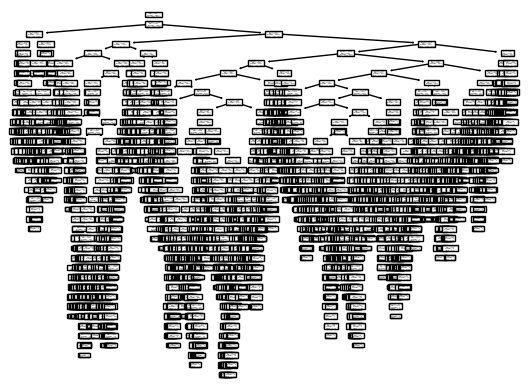

In [22]:
import matplotlib.pyplot as plt 
from sklearn import tree

for arbol in forest.estimators_:
    tree.plot_tree(arbol, feature_names=feature.columns)
    plt.show()

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


def metricas(reales, predichas):
    matriz = confusion_matrix(reales, predichas)
    exactitud = accuracy_score(reales, predichas)
    precision = precision_score(reales, predichas, average='micro')
    recall = recall_score(reales, predichas, average='micro')
    f1score = f1_score(reales, predichas, average='micro')
    return matriz, exactitud, precision, recall, f1score


def visualizar_metricas(reales, predichas, titulo):
    matriz, exactitud, precision, recall, f1score = \
        metricas(reales, predichas)

    plt.figure(figsize=(3, 3))
    matriz = pd.DataFrame(matriz, 
                          columns=["0 : No DDoS", "1 : Sí es DDoS"])
    plt.matshow(matriz, cmap="Blues", vmin=0, vmax=10, fignum=1)
    plt.title("Reales")
    plt.ylabel("Predichas")
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falsos\npositivos"),
                 ("Falsos\nnegativos", "Verdaderos\npositivos"))
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")           
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % exactitud, fontsize=20)
    plt.text(2.1, 0.40, "Precision: %0.2f" % precision, fontsize=20)
    plt.text(2.1, 0.70, "Recall: %0.2f" % recall, fontsize=20)
    plt.text(2.1, 1.00, "F1: %0.2f" % f1score, fontsize=20)    
    plt.show()
    print("\n" * 10)


pred = forest.predict(X_test)

pred

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'Normal', 'Normal'],
      dtype=object)

In [30]:
metricas(pred, y_test)

(array([[  275,   652],
        [ 2095, 32047]], dtype=int64),
 0.9216687102569221,
 0.9216687102569221,
 0.9216687102569221,
 0.9216687102569221)

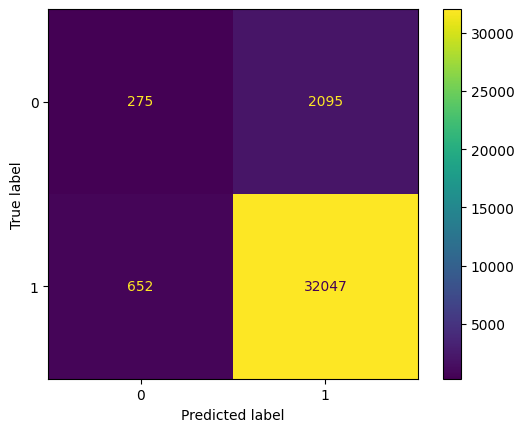

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix= confusion_matrix(y_test, pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [26]:
print(forest.estimators_[1])

DecisionTreeClassifier(max_features='sqrt', random_state=986376425)
